<h2>1.必要なライブラリを読み込む</h2>

In [710]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

matplotlib.style.use('ggplot')

<h2>2.データの読み込み</h2>

In [711]:
dataset = pd.read_csv('/Users/y-wad/Desktop/Room 4D/d_bukken_train.csv')

In [712]:
dataset.head()

,id,price_per_tsubo,use_classification,minute_to_station,land_space,land_shape,frontage_length,frontal_road_direction,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio
0,873361,410000,住宅地,12,65,ほぼ長方形,6.3,北東,私道,4.0,60,200
1,743914,320000,住宅地,60,155,ほぼ長方形,14.0,北東,市道,4.0,40,80
2,728916,610000,住宅地,26,100,ほぼ長方形,13.0,東,市道,6.0,50,100
3,670311,300000,住宅地,60,210,不整形,18.0,北,私道,5.0,40,80
4,803131,150000,住宅地,30,110,不整形,4.5,南西,市道,4.0,40,80


NameError: name 'corr' is not defined

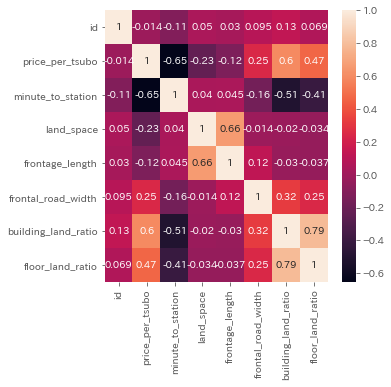

In [713]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(dataset.corr(),annot=True)
plt.ylim(0, corr.shape[0])
plt.show()

<h2>3.要約統計量の確認</h2>

In [ ]:
dataset.describe()

<h2>4.ヒストグラムを見る</h2>

In [ ]:
dataset.price_per_tsubo.hist()
plt.xlabel('price_per_tsubo') #横軸のラベル指定
plt.ylabel('Number of houses') #縦軸のラベル指定

In [ ]:
dataset.minute_to_station.hist()
plt.xlabel('minute_to_station') #横軸のラベル指定
plt.ylabel('Number of houses') #縦軸のラベル指定

In [ ]:
dataset.land_space.hist()
plt.xlabel('land_space') #横軸のラベル指定
plt.ylabel('Number of houses') #縦軸のラベル指定

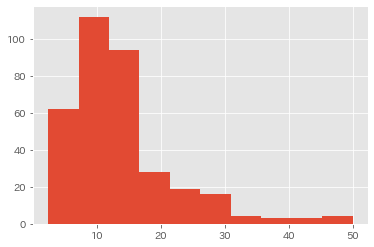

In [714]:
dataset.frontage_length.hist()

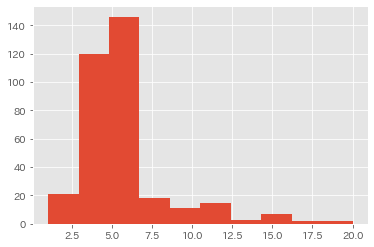

In [715]:
dataset.frontal_road_width.hist()

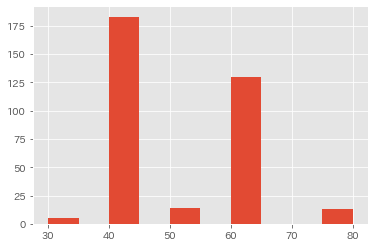

In [716]:
dataset.building_land_ratio.hist()

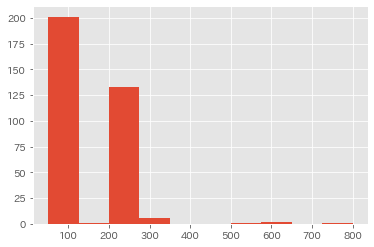

In [717]:
dataset.floor_land_ratio.hist()

<h2>5.ダミー変数を作る</h2>
<p> 一般的にはカテゴリ変数を機械学習のモデルに投入する際、0と1のダミー変数に変換する。</p>

In [718]:
dataset = pd.get_dummies(data=dataset, columns=['use_classification'])

In [719]:
dataset = pd.get_dummies(data=dataset, columns=['land_shape'])

In [720]:
dataset = pd.get_dummies(data=dataset, columns=['frontal_road_direction'])

In [721]:
dataset.head()

,id,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_kind,frontal_road_width,building_land_ratio,floor_land_ratio,use_classification_住宅地,...,land_shape_袋地等,land_shape_長方形,frontal_road_direction_北,frontal_road_direction_北東,frontal_road_direction_北西,frontal_road_direction_南,frontal_road_direction_南東,frontal_road_direction_南西,frontal_road_direction_東,frontal_road_direction_西
0,873361,410000,12,65,6.3,私道,4.0,60,200,1,...,0,0,0,1,0,0,0,0,0,0
1,743914,320000,60,155,14.0,市道,4.0,40,80,1,...,0,0,0,1,0,0,0,0,0,0
2,728916,610000,26,100,13.0,市道,6.0,50,100,1,...,0,0,0,0,0,0,0,0,1,0
3,670311,300000,60,210,18.0,私道,5.0,40,80,1,...,0,0,1,0,0,0,0,0,0,0
4,803131,150000,30,110,4.5,市道,4.0,40,80,1,...,0,0,0,0,0,0,0,1,0,0


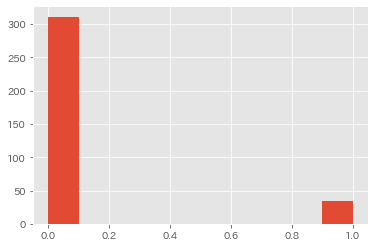

In [722]:
dataset.frontal_road_direction_西.hist()

<h2>6.相関を見る</h2>

In [723]:
#相関行列
dataset.corr()

,id,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_width,building_land_ratio,floor_land_ratio,use_classification_住宅地,land_shape_ほぼ台形,...,land_shape_袋地等,land_shape_長方形,frontal_road_direction_北,frontal_road_direction_北東,frontal_road_direction_北西,frontal_road_direction_南,frontal_road_direction_南東,frontal_road_direction_南西,frontal_road_direction_東,frontal_road_direction_西
id,1.000000,-0.013963,-0.107494,0.049786,0.030081,0.094672,0.133519,0.069245,NaN,0.017463,...,0.089675,0.033191,-0.022342,-0.051947,-0.028166,-0.005478,0.125535,-0.019168,-0.039810,0.028103
price_per_tsubo,-0.013963,1.000000,-0.654272,-0.229448,-0.124650,0.250321,0.596100,0.466534,NaN,-0.121456,...,-0.029312,0.107318,0.066795,-0.054842,-0.092928,0.079481,-0.105979,-0.036428,0.081488,0.026021
minute_to_station,-0.107494,-0.654272,1.000000,0.040021,0.045355,-0.164822,-0.506854,-0.406796,NaN,0.081571,...,-0.021616,-0.020066,-0.056871,0.089791,0.109060,-0.021405,0.037125,-0.000402,-0.103215,-0.022537
land_space,0.049786,-0.229448,0.040021,1.000000,0.659973,-0.013639,-0.020073,-0.034123,NaN,-0.039599,...,-0.023929,-0.092201,0.040218,-0.085877,0.024868,-0.010675,0.003757,0.068627,-0.010680,-0.033680
frontage_length,0.030081,-0.124650,0.045355,0.659973,1.000000,0.123141,-0.030433,-0.037457,NaN,0.041637,...,-0.055123,-0.114652,0.053998,-0.022730,0.004867,-0.037995,0.018360,0.042835,0.030353,-0.094073
frontal_road_width,0.094672,0.250321,-0.164822,-0.013639,0.123141,1.000000,0.322714,0.247848,NaN,-0.028062,...,-0.013375,0.096191,0.040063,-0.024577,-0.065546,0.055375,0.028531,0.003758,-0.054852,-0.018735
building_land_ratio,0.133519,0.596100,-0.506854,-0.020073,-0.030433,0.322714,1.000000,0.791344,NaN,-0.131423,...,-0.044007,0.055289,0.111384,-0.054026,-0.081020,0.106659,-0.186406,-0.025553,0.061810,0.028708
floor_land_ratio,0.069245,0.466534,-0.406796,-0.034123,-0.037457,0.247848,0.791344,1.000000,NaN,-0.127864,...,-0.037457,0.041326,0.066355,-0.020262,-0.077200,0.059007,-0.158402,0.043613,0.022685,0.043606
use_classification_住宅地,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land_shape_ほぼ台形,0.017463,-0.121456,0.081571,-0.039599,0.041637,-0.028062,-0.131423,-0.127864,NaN,1.000000,...,-0.021412,-0.189530,-0.022565,0.085563,0.051959,-0.074300,-0.064759,-0.011858,-0.064643,0.152182


<p>price_per_tsuboと正の相関関係がありそう：★building_land_ratio　0.596　、floor_land_ratio　0.466</p>
<p>price_per_tsuboと負の相関関係がありそう：★minute_to_station　-0.654272、land_space　-0.22944</p>

<h2>7.散布図を確認</h2>

<h3>price_per_tsubo（坪単価）とbuilding_land_ratio（建ぺい率）</h3>

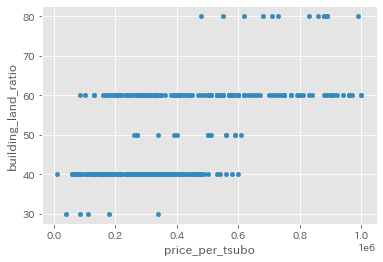

In [724]:
dataset.plot(kind='scatter', x='price_per_tsubo', y='building_land_ratio')

<h3>price_per_tsuboとminute_to_station</h3>

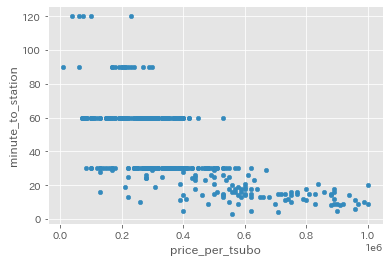

In [725]:
dataset.plot(kind='scatter', x='price_per_tsubo', y='minute_to_station')

<h3>おまけ：あんまり関係なし　駅近と広さ</h3>

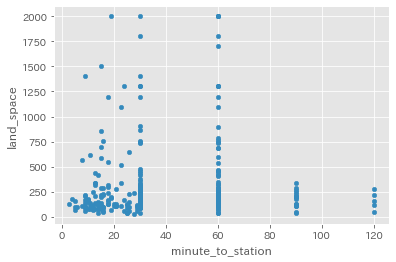

In [726]:
dataset.plot(kind='scatter', x='minute_to_station', y='land_space')

<h2>8.欠損値を確認</h2>

In [727]:
col_names = dataset.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(dataset[col_name]))
    print(col_name, '; # of missing record: ', missing_num)

id ; # of missing record:  0
price_per_tsubo ; # of missing record:  0
minute_to_station ; # of missing record:  0
land_space ; # of missing record:  0
frontage_length ; # of missing record:  0
frontal_road_kind ; # of missing record:  0
frontal_road_width ; # of missing record:  0
building_land_ratio ; # of missing record:  0
floor_land_ratio ; # of missing record:  0
use_classification_住宅地 ; # of missing record:  0
land_shape_ほぼ台形 ; # of missing record:  0
land_shape_ほぼ整形 ; # of missing record:  0
land_shape_ほぼ正方形 ; # of missing record:  0
land_shape_ほぼ長方形 ; # of missing record:  0
land_shape_不整形 ; # of missing record:  0
land_shape_台形 ; # of missing record:  0
land_shape_正方形 ; # of missing record:  0
land_shape_袋地等 ; # of missing record:  0
land_shape_長方形 ; # of missing record:  0
frontal_road_direction_北 ; # of missing record:  0
frontal_road_direction_北東 ; # of missing record:  0
frontal_road_direction_北西 ; # of missing record:  0
frontal_road_direction_南 ; # of missing record:  0

<h2>.Scikit Learnを用いた線形回帰モデルの構築</h2>

In [728]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<h3>ターゲット変数と特徴量を指定してsklearnに渡せるように準備する</h3>

In [729]:
target_col = 'price_per_tsubo'
exclude_cols = ['price_per_tsubo', 'id', 'use_classification_住宅地' , 'frontal_road_kind']
feature_cols = [col for col in dataset.columns if col not in exclude_cols]

In [730]:
feature_cols

['minute_to_station',
 'land_space',
 'frontage_length',
 'frontal_road_width',
 'building_land_ratio',
 'floor_land_ratio',
 'land_shape_ほぼ台形',
 'land_shape_ほぼ整形',
 'land_shape_ほぼ正方形',
 'land_shape_ほぼ長方形',
 'land_shape_不整形',
 'land_shape_台形',
 'land_shape_正方形',
 'land_shape_袋地等',
 'land_shape_長方形',
 'frontal_road_direction_北',
 'frontal_road_direction_北東',
 'frontal_road_direction_北西',
 'frontal_road_direction_南',
 'frontal_road_direction_南東',
 'frontal_road_direction_南西',
 'frontal_road_direction_東',
 'frontal_road_direction_西']

## 説明変数（特徴量）

In [731]:
dataset[feature_cols].head()

,minute_to_station,land_space,frontage_length,frontal_road_width,building_land_ratio,floor_land_ratio,land_shape_ほぼ台形,land_shape_ほぼ整形,land_shape_ほぼ正方形,land_shape_ほぼ長方形,...,land_shape_袋地等,land_shape_長方形,frontal_road_direction_北,frontal_road_direction_北東,frontal_road_direction_北西,frontal_road_direction_南,frontal_road_direction_南東,frontal_road_direction_南西,frontal_road_direction_東,frontal_road_direction_西
0,12,65,6.3,4.0,60,200,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,60,155,14.0,4.0,40,80,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,26,100,13.0,6.0,50,100,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,60,210,18.0,5.0,40,80,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,30,110,4.5,4.0,40,80,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 被説明変数（ターゲット変数）

In [732]:
dataset[target_col].head()

0    410000
1    320000
2    610000
3    300000
4    150000
Name: price_per_tsubo, dtype: int64

### 特徴量を X に、ターゲット変数を y に格納します。

In [733]:
y = dataset[target_col]
X = dataset[feature_cols]

NumPyの配列に直した特徴量の行列

In [734]:
X

,minute_to_station,land_space,frontage_length,frontal_road_width,building_land_ratio,floor_land_ratio,land_shape_ほぼ台形,land_shape_ほぼ整形,land_shape_ほぼ正方形,land_shape_ほぼ長方形,...,land_shape_袋地等,land_shape_長方形,frontal_road_direction_北,frontal_road_direction_北東,frontal_road_direction_北西,frontal_road_direction_南,frontal_road_direction_南東,frontal_road_direction_南西,frontal_road_direction_東,frontal_road_direction_西
0,12,65,6.3,4.0,60,200,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,60,155,14.0,4.0,40,80,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,26,100,13.0,6.0,50,100,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,60,210,18.0,5.0,40,80,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,30,110,4.5,4.0,40,80,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,4,180,15.0,2.0,60,200,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,60,195,5.0,4.0,40,80,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,16,230,15.0,2.5,50,100,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8,60,1200,50.0,5.0,40,80,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,15,590,14.0,6.0,60,200,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


こちらは被説明変数（ターゲット変数）のベクトル

In [735]:
y

0       410000
1       320000
2       610000
3       300000
4       150000
5       710000
6        85000
7       510000
8       250000
9       620000
10      220000
11      320000
12      260000
13      370000
14      180000
15     1000000
16      340000
17      410000
18      240000
19      330000
20      470000
21      250000
22      470000
23      770000
24      220000
25      300000
26      280000
27      390000
28      270000
29      100000
30      110000
31      570000
32      330000
33      250000
34      440000
35      500000
36      490000
37      590000
38      220000
39      800000
40      940000
41      600000
42      380000
43      620000
44      280000
45      750000
46      400000
47       39000
48      590000
49      190000
50      550000
51      200000
52      310000
53      410000
54      240000
55      400000
56      120000
57      280000
58      390000
59      480000
60      550000
61      350000
62      100000
63      900000
64      350000
65      420000
66      22

<h2>線形回帰モデルの実装</h2>

学習データを70%(X_train, y_train)、テストデータを30%(X_test, y_test)に分割にする。

In [736]:
# 訓練データ：テストデータ＝7:3に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [737]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_test_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

test_lm_mse = mean_squared_error(y_test, y_test_pred)
train_lm_mse = mean_squared_error(y_train, y_train_pred)

print('LinerRegression RMSE test: ', np.sqrt(test_lm_mse))
print('LinerRegression RMSE train', np.sqrt(train_lm_mse))

LinerRegression RMSE test:  144356.60373185913
LinerRegression RMSE train 135175.35028654427


In [738]:
# 決定係数による予測精度算出
from sklearn.metrics import r2_score
print('r^2 train data: ', r2_score(y_train, y_train_pred))
print('r^2 test data: ', r2_score(y_test, y_test_pred))

r^2 train data:  0.6184678969818892
r^2 test data:  0.506860539347325


回帰係数は以下のようにとり出せる

In [739]:
coef_pd = pd.DataFrame(lm.coef_, columns=['coef'], index=feature_cols)
coef_pd

,coef
minute_to_station,-4286.662231
land_space,-149.000822
frontage_length,3707.005507
frontal_road_width,2196.850465
building_land_ratio,6137.438061
floor_land_ratio,-0.634673
land_shape_ほぼ台形,-51207.998492
land_shape_ほぼ整形,53906.707065
land_shape_ほぼ正方形,73939.527362
land_shape_ほぼ長方形,-7617.047517


<p>回帰係数の可視化</p>

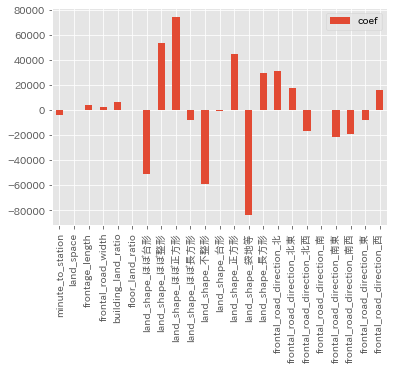

In [740]:
coef_pd.plot(kind='bar')

<h2>各データの正規化</h2>

In [741]:
from statistics import mean, variance
import scipy.stats

In [742]:
p_feature = ["Nor_price"]
m_feature = ["Nor_minu"]
b_feature = ["Nor_build"]

In [743]:
Nor_price = scipy.stats.zscore(dataset["price_per_tsubo"])
d_Nor_price = pd.DataFrame(Nor_price,columns = p_feature)
print(d_Nor_price)

Nor_minu = scipy.stats.zscore(dataset["minute_to_station"])
d_Nor_minu = pd.DataFrame(Nor_minu,columns = m_feature)
print(d_Nor_minu)


Nor_build = scipy.stats.zscore(dataset["building_land_ratio"])
d_Nor_build = pd.DataFrame(Nor_build,columns = b_feature)
print(d_Nor_build)


     Nor_price
0     0.107565
1    -0.311074
2     1.037874
3    -0.404104
4    -1.101836
5     1.503028
6    -1.404186
7     0.572719
8    -0.636682
9     1.084389
10   -0.776228
11   -0.311074
12   -0.590166
13   -0.078496
14   -0.962290
15    2.851975
16   -0.218043
17    0.107565
18   -0.683197
19   -0.264558
20    0.386658
21   -0.636682
22    0.386658
23    1.782121
24   -0.776228
25   -0.404104
26   -0.497135
27    0.014534
28   -0.543651
29   -1.334413
30   -1.287898
31    0.851812
32   -0.264558
33   -0.636682
34    0.247112
35    0.526204
36    0.479689
37    0.944843
38   -0.776228
39    1.921667
40    2.572883
41    0.991358
42   -0.031981
43    1.084389
44   -0.497135
45    1.689090
46    0.061050
47   -1.618157
48    0.944843
49   -0.915774
50    0.758781
51   -0.869259
52   -0.357589
53    0.107565
54   -0.683197
55    0.061050
56   -1.241382
57   -0.497135
58    0.014534
59    0.433173
60    0.758781
61   -0.171527
62   -1.334413
63    2.386821
64   -0.171527
65    0.15

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe14d4bc070>]],
      dtype=object)

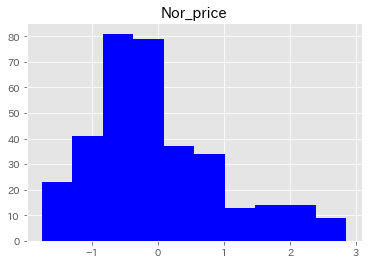

In [744]:
d_Nor_price.hist(color = "b")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe14d736370>]],
      dtype=object)

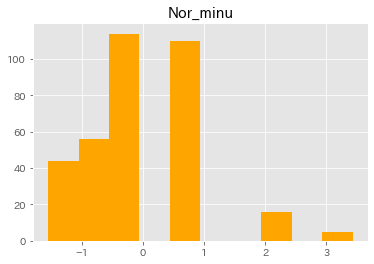

In [745]:
d_Nor_minu.hist(color = "orange")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe14d736250>]],
      dtype=object)

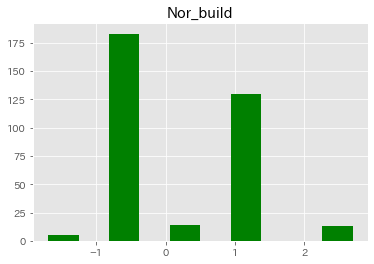

In [746]:
d_Nor_build.hist(color = "green")

<h2>一次元の異常検知</h2>

<h3>1.price_per_tsubo</h3>

In [747]:
x = d_Nor_price["Nor_price"]

#標本平均
mu = mean(x)
N=len(x)

#標本分散
sig =(np.sum( (x-mu)**2 ))/N
sig = np.sqrt(sig)

#F統計量＝データー平均 ÷分散　の２乗
a = ( (x- mu)/sig )**2
import scipy.stats as stats

#
a_th =stats.chi2.ppf(q=0.99, df=1)
print(a_th)

6.6348966010212145


Text(0.5, 1.0, 'Anomaly Of Dates')

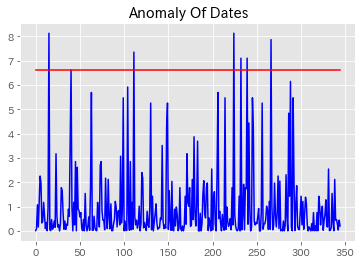

In [748]:
plt.plot(a, c ="b")
plt.plot(a_th*np.ones(len(a)), c="r")
plt.title("Anomaly Of Dates")

In [749]:
anomaly = x[a>a_th].index

print(anomaly)
x.loc[anomaly]

Int64Index([15, 111, 224, 232, 239, 266], dtype='int64')


15     2.851975
111    2.712429
224    2.851975
232    2.665914
239    2.665914
266    2.805460
Name: Nor_price, dtype: float64

In [750]:
for i in anomaly:
    print(i,dataset["price_per_tsubo"][i])

15 1000000
111 970000
224 1000000
232 960000
239 960000
266 990000


<h3>2.minute_to_station</h3>

In [751]:
y = d_Nor_minu["Nor_minu"]

print(y)
mu = mean(y)
N=len(y)
sig =(np.sum( (y-mu)**2 ))/N
sig = np.sqrt(sig)
 
a = ( (y- mu)/sig )**2
import scipy.stats as stats
a_th =stats.chi2.ppf(q=0.99, df=1)
print(a_th)

0     -1.166492
1      0.875054
2     -0.571041
3      0.875054
4     -0.400912
5     -1.506749
6      0.875054
7     -0.996363
8      0.875054
9     -1.038895
10    -0.400912
11    -0.400912
12     0.875054
13     0.875054
14     0.875054
15    -0.826234
16     0.875054
17    -0.400912
18    -0.400912
19    -0.400912
20    -0.400912
21     0.875054
22    -0.698638
23    -0.996363
24     0.875054
25     2.151020
26    -0.400912
27    -1.209024
28    -0.400912
29     0.875054
30     0.875054
31    -0.911299
32     0.875054
33     0.875054
34    -0.698638
35    -1.038895
36    -0.571041
37    -0.911299
38     0.875054
39    -0.911299
40    -1.081427
41    -0.783702
42     0.875054
43    -0.911299
44     0.875054
45    -0.996363
46    -0.400912
47     3.426986
48    -0.996363
49     2.151020
50    -1.251556
51     0.875054
52    -0.868766
53    -0.400912
54    -0.400912
55    -0.400912
56     0.875054
57    -0.400912
58    -0.400912
59    -0.400912
60    -0.400912
61     0.875054
62    -0

Text(0.5, 1.0, 'Anomaly Of Dates')

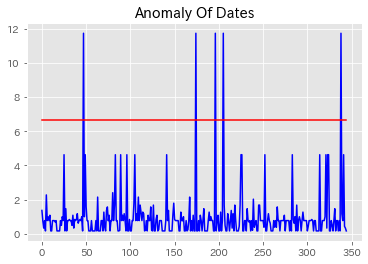

In [752]:
plt.plot(a, c ="b")
plt.plot(a_th*np.ones(len(a)), c="r")
plt.title("Anomaly Of Dates")

In [753]:
anomaly = y[a>a_th].index

y.loc[anomaly]

47     3.426986
174    3.426986
196    3.426986
205    3.426986
338    3.426986
Name: Nor_minu, dtype: float64

In [754]:
for i in anomaly:
    print(i,dataset["minute_to_station"][i])

47 120
174 120
196 120
205 120
338 120


<h3>3.building_land_ratio</h3>

In [755]:
z = d_Nor_build["Nor_build"]

mu = mean(z)
N=len(z)
sig =(np.sum( (z-mu)**2 ))/N
sig = np.sqrt(sig)
 
a = ( (z- mu)/sig )**2
import scipy.stats as stats
a_th =stats.chi2.ppf(q=0.99, df=1)
print(a)
print(a_th)

0      0.880310
1      0.666182
2      0.003724
3      0.666182
4      0.666182
5      0.880310
6      0.666182
7      0.003724
8      0.666182
9      0.880310
10     0.666182
11     0.666182
12     0.666182
13     0.666182
14     0.666182
15     0.880310
16     0.003724
17     0.666182
18     0.666182
19     0.666182
20     0.666182
21     0.666182
22     0.880310
23     0.880310
24     0.666182
25     0.666182
26     0.666182
27     0.880310
28     0.666182
29     0.666182
30     0.666182
31     0.880310
32     0.666182
33     0.666182
34     0.880310
35     0.880310
36     0.666182
37     0.880310
38     0.666182
39     0.880310
40     0.880310
41     0.880310
42     0.880310
43     0.880310
44     0.666182
45     0.880310
46     0.880310
47     2.867683
48     0.003724
49     0.880310
50     0.880310
51     0.666182
52     0.880310
53     0.880310
54     0.666182
55     0.880310
56     0.666182
57     0.666182
58     0.666182
59     0.880310
60     0.880310
61     0.666182
62     0

Text(0.5, 1.0, 'Anomaly Of Dates')

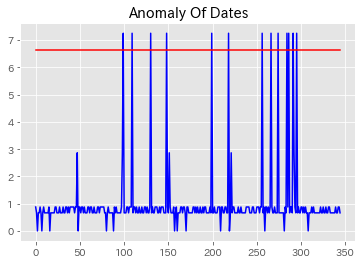

In [756]:
plt.plot(a, c ="b")
plt.plot(a_th*np.ones(len(a)), c="r")
plt.title("Anomaly Of Dates")

In [757]:
anomaly = z[a>a_th].index

z.loc[anomaly]

99     2.692696
109    2.692696
130    2.692696
148    2.692696
199    2.692696
218    2.692696
256    2.692696
266    2.692696
274    2.692696
284    2.692696
286    2.692696
291    2.692696
295    2.692696
Name: Nor_build, dtype: float64

In [758]:
for i in anomaly:
    print(i,dataset["building_land_ratio"][i])

99 80
109 80
130 80
148 80
199 80
218 80
256 80
266 80
274 80
284 80
286 80
291 80
295 80


<h2>高次元の異常検知</h2>

<h3>1.「坪単価」と「駅近」の異常検知</h3>

In [759]:
e = [list(i) for i in zip(x, y)]

#標本平均
mu = np.mean(e)
N=len(e)
M=2

#坪単価と駅までの時間のベクトル
Sigs = []

for i in e:
    Sig = np.dot((i-mu).T,(i-mu) )/N
    Sigs.append(Sig)

#ここからSigsを一つの箱として、平均などを計算
#標本平均
mu = mean(Sigs)
N=len(Sigs)

print(mu)

#標本分散
sig =(np.sum( (Sigs-mu)**2 ))/N
sig = np.sqrt(sig)

print(sig)

#F統計量＝データー平均 ÷分散　の２乗
a = ( (Sigs- mu)/sig )**2
print(a)

0.005797101449275362
0.007070333640915713
[6.62251632e-02 2.17468109e-01 5.98464168e-02 1.92772514e-01
 6.56988528e-02 1.07525758e+00 9.14020938e-02 7.75434853e-02
 1.15479417e-01 1.09459599e-02 2.57062442e-01 5.10303883e-01
 1.31927263e-01 2.53491283e-01 1.59724653e-02 7.80900046e+00
 2.36696521e-01 5.61424548e-01 3.16602132e-01 5.26107306e-01
 4.79882259e-01 1.15479417e-01 3.11955078e-01 7.90456679e-01
 6.70770863e-02 1.30842382e+00 4.26026692e-01 4.86549225e-02
 4.00511772e-01 5.01726218e-02 3.02712889e-02 3.31247254e-02
 2.27826494e-01 1.15479417e-01 3.53770706e-01 6.96613816e-02
 3.50350445e-01 1.28776149e-02 6.70770863e-02 1.07006191e+00
 5.63275330e+00 2.72982567e-02 2.55617125e-01 6.80891247e-06
 1.63771075e-01 5.72577066e-01 5.66253366e-01 2.56865687e+01
 2.20465634e-03 2.01846342e+00 3.39567194e-03 3.85083419e-02
 2.09835958e-01 5.61424548e-01 3.16602132e-01 5.66253366e-01
 1.58141971e-02 4.26026692e-01 5.68424668e-01 4.58466612e-01
 2.68316012e-01 2.43980231e-01 5.77361732e-

In [760]:
Sigs_d = pd.DataFrame(Sigs)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe14da35f70>]],
      dtype=object)

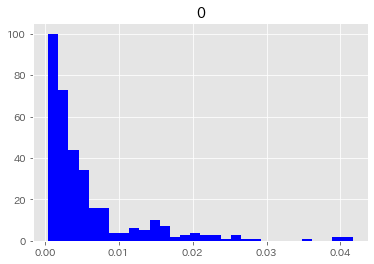

In [761]:
Sigs_d.hist(bins=30,color="b")

4.605170185988092


Text(0, 0.5, 'Anomaly')

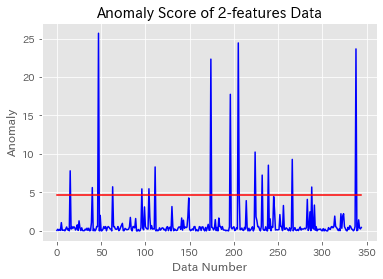

In [762]:
import scipy.stats as stats
a_th =stats.chi2.ppf(q=0.90, df=M)
print(a_th)

 
plt.plot(a, c ="b")
plt.plot(a_th*np.ones(len(e)),c="r")
plt.title("Anomaly Score of 2-features Data")
plt.xlabel("Data Number")
plt.ylabel("Anomaly")

In [763]:
e_feature = ["Nor_price","Nor_minu"]
e2 = pd.DataFrame(e, columns = e_feature)

e_anomaly = e2[a>a_th].index

print(e_anomaly)
e2.loc[e_anomaly]

Int64Index([15, 40, 47, 63, 96, 104, 111, 174, 196, 205, 206, 224, 232, 239,
            266, 288, 338],
           dtype='int64')


,Nor_price,Nor_minu
15,2.851975,-0.826234
40,2.572883,-1.081427
47,-1.618157,3.426986
63,2.386821,-1.464217
96,-1.753052,2.151020
104,2.433336,-1.336621
111,2.712429,-1.294088
174,-1.334413,3.426986
196,-0.729712,3.426986
205,-1.520475,3.426986


In [764]:
for i in e_anomaly:
    print(i,dataset["price_per_tsubo"][i],dataset["minute_to_station"][i])

15 1000000 20
40 940000 14
47 39000 120
63 900000 5
96 10000 90
104 910000 8
111 970000 9
174 100000 120
196 230000 120
205 60000 120
206 900000 9
224 1000000 9
232 960000 11
239 960000 6
266 990000 10
288 920000 9
338 74000 120


<h2>Scikit Learnを用いた予測モデルの構築</h2>

<h2>精度評価</h2>
<p>今回は不均衡なデータで分類問題なのでかきのいずれかを選択する</p>
<p>正当な物件：正　釣り物件：負</p>
<p>・正解率（Accuracy）どれだけ正確に予測できているか：ほとんどが正になるから、正解率が高いはず</p>
<p>・適合率・精度（Precision）正と予測したものがどれだけ正しかったか「負」を逃したい→「正」だと思って間違える数を減らしたい</p>
<p>・再現率（Recall）どれだけ取りこぼしなく予測することができたか。見逃さない→「負」だと思って間違える数を減らしたい</p>
<p>・F値</p>

指標	何を表すか
Accuracy	どれだけ正確に予測できているか
Recall	どれだけ取りこぼしなく予測することができたか
Precision	正と予測したものがどれだけ正しかったか

<h3>今回は再現率かF値を採用したい</h3>

<h2>データの前処理</h2>

<h3>1.datasetにtargetというカラムを追加</h3>
<h3>2.targetカラムの、外れ値検知したインデックス番号には0、それ以外は1を入れる</h3>
<p>正解１を正当なデータ、外れ０を異常検知データ</p>

In [765]:
dataset["e_target"] = 1

In [766]:
#インデックス番号を取得できるようにする　kで取得可能

for k,v  in enumerate(dataset["id"]):
    for i in e_anomaly:
        if i == k:
            dataset["e_target"][i] = 0

<ipython-input-766-79df1ae56a6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["e_target"][i] = 0


In [767]:
pd.set_option('display.max_rows', 350)

In [768]:
dataset["e_target"]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     0
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     0
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     0
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    0
105    1
106    1
107    1
108    1
109    1
110    1
1

<h2>予測モデルの構築</h2>

<h3>坪単価と駅までの時間モデルの構築と評価</h3>

In [796]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, confusion_matrix

In [797]:
target_col = 'e_target'
exclude_cols = ['e_target','f_target','id','frontal_road_kind']
feature_cols = [col for col in dataset.columns if col not in exclude_cols]

In [798]:
feature_cols

['price_per_tsubo',
 'minute_to_station',
 'land_space',
 'frontage_length',
 'frontal_road_width',
 'building_land_ratio',
 'floor_land_ratio',
 'use_classification_住宅地',
 'land_shape_ほぼ台形',
 'land_shape_ほぼ整形',
 'land_shape_ほぼ正方形',
 'land_shape_ほぼ長方形',
 'land_shape_不整形',
 'land_shape_台形',
 'land_shape_正方形',
 'land_shape_袋地等',
 'land_shape_長方形',
 'frontal_road_direction_北',
 'frontal_road_direction_北東',
 'frontal_road_direction_北西',
 'frontal_road_direction_南',
 'frontal_road_direction_南東',
 'frontal_road_direction_南西',
 'frontal_road_direction_東',
 'frontal_road_direction_西']


### 特徴量を X に、ターゲット変数を y に格納します。

In [799]:
y = dataset[target_col]
X = dataset[feature_cols]

学習データを70%(X_train, y_train)、テストデータを30%(X_test, y_test)に分割にする。

In [800]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=1234)

In [801]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)

# 正当な物件である(1になる)確率は以下の通り。
X_test["正当物件確率"] = y_proba[:, 1]
X_test.head()

<ipython-input-801-542ec289e80a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["正当物件確率"] = y_proba[:, 1]


,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_width,building_land_ratio,floor_land_ratio,use_classification_住宅地,land_shape_ほぼ台形,land_shape_ほぼ整形,...,land_shape_長方形,frontal_road_direction_北,frontal_road_direction_北東,frontal_road_direction_北西,frontal_road_direction_南,frontal_road_direction_南東,frontal_road_direction_南西,frontal_road_direction_東,frontal_road_direction_西,正当物件確率
202,660000,13,80,8.0,6.0,60,200,1,1,0,...,0,0,0,0,1,0,0,0,0,0.98
286,860000,16,60,5.0,11.0,80,300,1,0,0,...,1,0,0,0,1,0,0,0,0,0.96
305,640000,18,320,15.0,18.0,60,200,1,0,0,...,0,1,0,0,0,0,0,0,0,0.98
66,220000,30,360,25.0,5.0,60,200,1,0,0,...,0,0,0,0,1,0,0,0,0,1.00
37,590000,18,165,12.0,5.0,60,200,1,0,0,...,0,0,0,0,0,0,0,0,1,0.99


In [802]:
y_proba

array([[0.02, 0.98],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.43, 0.57],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.1 , 0.9 ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.4 , 0.6 ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.43, 0.57],
       [0.03, 0.97],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.09, 0.91],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.05,

In [803]:
# clickされる確率に実際にクリックされたか否かのデータを追加
X_test["実際の正当物件"] = y_test
X_test

<ipython-input-803-d9a8fb12a4c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["実際の正当物件"] = y_test


,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_width,building_land_ratio,floor_land_ratio,use_classification_住宅地,land_shape_ほぼ台形,land_shape_ほぼ整形,...,frontal_road_direction_北,frontal_road_direction_北東,frontal_road_direction_北西,frontal_road_direction_南,frontal_road_direction_南東,frontal_road_direction_南西,frontal_road_direction_東,frontal_road_direction_西,正当物件確率,実際の正当物件
202,660000,13,80,8.0,6.0,60,200,1,1,0,...,0,0,0,1,0,0,0,0,0.98,1
286,860000,16,60,5.0,11.0,80,300,1,0,0,...,0,0,0,1,0,0,0,0,0.96,1
305,640000,18,320,15.0,18.0,60,200,1,0,0,...,1,0,0,0,0,0,0,0,0.98,1
66,220000,30,360,25.0,5.0,60,200,1,0,0,...,0,0,0,1,0,0,0,0,1.00,1
37,590000,18,165,12.0,5.0,60,200,1,0,0,...,0,0,0,0,0,0,0,1,0.99,1
111,970000,9,105,10.0,4.0,60,200,1,0,0,...,1,0,0,0,0,0,0,0,0.57,0
332,410000,30,160,3.0,5.0,60,200,1,0,0,...,0,0,0,0,0,0,0,1,0.99,1
97,510000,30,290,12.6,4.0,60,200,1,0,0,...,0,0,0,0,0,1,0,0,1.00,1
227,430000,30,150,13.0,4.0,40,800,1,0,0,...,0,0,0,0,0,1,0,0,0.90,1
7,510000,16,230,15.0,2.5,50,100,1,0,0,...,1,0,0,0,0,0,0,0,1.00,1


In [804]:
def get_conf_matrix(threshold, y_proba, y_test):
    y_pred = (y_proba[:, 1] > threshold).astype(int)
    labels = [0, 1]
    confusion_m = confusion_matrix(y_test, y_pred, labels=labels)
    confusionm_df = pd.DataFrame(confusion_m, columns=labels, index=labels)
    confusionm_df.rename(columns={0: "predicted_0", 1: "predicted_1"}, index={0: "actual_0", 1: "actual_1"}, inplace=True)
    return confusionm_df

In [805]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, fbeta_score

In [806]:
y_proba[0]

array([0.02, 0.98])

In [807]:
y_proba[:, 1][0]

0.98

In [808]:
y_test[0]

1

In [809]:
# 閾値を0.2にした場合
get_conf_matrix(0.2, y_proba, y_test)

,predicted_0,predicted_1
actual_0,0,6
actual_1,0,98


In [810]:
y_pred = []

for i in y_proba[:, 1] :
    if i > 0.2:
        y_preds = 1
        y_pred.append(y_preds)
    else:
        y_preds = 0
        y_pred.append(y_preds)
        
y_pred[0]

1

In [811]:
print("Precision",precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))

Precision 0.9423076923076923
Recall: 1.0
F1 score: 0.9702970297029703


In [812]:
# 閾値を0.5にした場合
get_conf_matrix(0.5, y_proba, y_test)

,predicted_0,predicted_1
actual_0,0,6
actual_1,0,98


In [813]:
y_pred = []

for i in y_proba[:, 1] :
    if i > 0.5:
        y_preds = 1
        y_pred.append(y_preds)
    else:
        y_preds = 0
        y_pred.append(y_preds)
        
y_pred[0]

1

In [814]:
print("Precision",precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))

Precision 0.9423076923076923
Recall: 1.0
F1 score: 0.9702970297029703


In [815]:
# 閾値を0.9にした場合
get_conf_matrix(0.9, y_proba, y_test)

,predicted_0,predicted_1
actual_0,6,0
actual_1,4,94


In [816]:
y_pred = []

for i in y_proba[:, 1] :
    if i > 0.9:
        y_preds = 1
        y_pred.append(y_preds)
    else:
        y_preds = 0
        y_pred.append(y_preds)

In [817]:
print("Precision",precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))

Precision 1.0
Recall: 0.9591836734693877
F1 score: 0.9791666666666666


In [818]:
# 閾値を0.95にした場合
get_conf_matrix(0.95, y_proba, y_test)

,predicted_0,predicted_1
actual_0,6,0
actual_1,11,87


In [819]:
y_pred = []

for i in y_proba[:, 1] :
    if i > 0.95:
        y_preds = 1
        y_pred.append(y_preds)
    else:
        y_preds = 0
        y_pred.append(y_preds)
        
y_pred[0]

1

In [820]:
print("Precision",precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))

Precision 1.0
Recall: 0.8877551020408163
F1 score: 0.9405405405405405


<h3>2.「坪単価」と「建ぺい率」の異常検知</h3>

In [848]:
f = [list(i) for i in zip(x, z)]

#標本平均
mu = np.mean(f)
N=len(f)
M=2

#坪単価と建ぺい率のベクトル
Sigs = []

for i in f:
    Sig = np.dot((i-mu).T,(i-mu) )/N
    Sigs.append(Sig)

#ここからSigsを一つの箱として、平均などを計算
#標本平均
mu = mean(Sigs)
N=len(Sigs)
M=2
print(mu)

#標本分散
sig =(np.sum( (Sigs-mu)**2 ))/N
sig = np.sqrt(sig)

print(sig)

#F統計量＝データー平均 ÷分散　の２乗
a = ( (Sigs- mu)/sig )**2
print(a)

0.005797101449275362
0.006743928668261619
[2.26834752e-01 2.82690619e-01 1.56047167e-01 2.53099880e-01
 2.65018395e-03 2.39822722e-01 7.51741822e-02 5.14123835e-01
 1.59241925e-01 5.83651558e-04 9.87901047e-02 2.82690619e-01
 1.79419093e-01 3.25617206e-01 3.07232168e-02 9.08816895e+00
 7.01521091e-01 3.22969622e-01 1.38878264e-01 2.95060634e-01
 2.59101297e-01 1.59241925e-01 1.73878572e-01 7.81075917e-01
 9.87901047e-02 2.53099880e-01 2.18139850e-01 2.31509027e-01
 1.99136055e-01 3.68841078e-02 1.94954417e-02 2.86921791e-02
 2.95060634e-01 1.59241925e-01 2.07024275e-01 1.31215354e-01
 2.25035673e-01 9.51576307e-03 9.87901047e-02 1.22307627e+00
 5.58813396e+00 3.46208259e-03 2.31173495e-01 5.83651558e-04
 2.18139850e-01 5.55009132e-01 2.30057158e-01 2.24501543e+00
 2.24966736e-01 1.45914203e-02 5.46563174e-02 6.17594484e-02
 1.81719726e-01 2.26834752e-01 1.38878264e-01 2.30057158e-01
 7.93163183e-03 2.18139850e-01 3.28542525e-01 1.60478042e-01
 5.46563174e-02 3.14307825e-01 8.07041732e-

In [849]:
Sigs_a = pd.DataFrame(Sigs)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe14ea38c10>]],
      dtype=object)

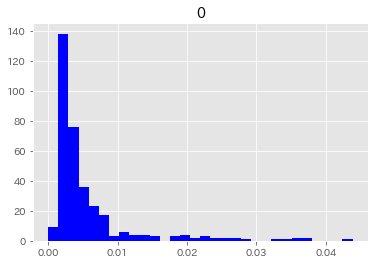

In [850]:
Sigs_a.hist(bins=30,color="b")

4.605170185988092


Text(0, 0.5, 'Anomaly')

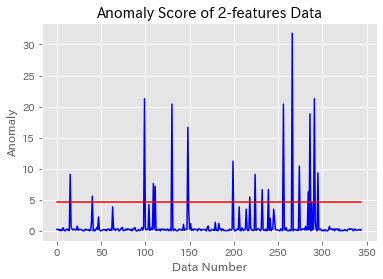

In [851]:
import scipy.stats as stats
a_th =stats.chi2.ppf(q=0.90, df=M)
print(a_th)
 
plt.plot(a, c ="b")
plt.plot(a_th*np.ones(len(f)),c="r")
plt.title("Anomaly Score of 2-features Data")
plt.xlabel("Data Number")
plt.ylabel("Anomaly")

In [852]:
f_feature = ["Nor_price","Nor_build"]
f2 = pd.DataFrame(f, columns = f_feature)

f_anomaly = f2[a>a_th].index

print(f_anomaly)
f2.loc[f_anomaly]

Int64Index([ 15,  40,  99, 109, 111, 130, 148, 199, 218, 224, 232, 239, 256,
            266, 274, 284, 286, 288, 291, 295],
           dtype='int64')


,Nor_price,Nor_build
15,2.851975,0.938248
40,2.572883,0.938248
99,2.340306,2.692696
109,1.084389,2.692696
111,2.712429,0.938248
130,2.293790,2.692696
148,2.061213,2.692696
199,1.596059,2.692696
218,0.433173,2.692696
224,2.851975,0.938248


In [853]:
for i in f_anomaly:
    print(i,dataset["price_per_tsubo"][i],dataset["building_land_ratio"][i])

15 1000000 60
40 940000 60
99 890000 80
109 620000 80
111 970000 60
130 880000 80
148 830000 80
199 730000 80
218 480000 80
224 1000000 60
232 960000 60
239 960000 60
256 880000 80
266 990000 80
274 710000 80
284 550000 80
286 860000 80
288 920000 60
291 890000 80
295 680000 80


In [854]:
dataset["f_target"] = 1

In [855]:
#インデックス番号を取得できるようにする　kで取得可能
for k,v  in enumerate(dataset["id"]):
    for i in f_anomaly:
        if i == k:
            dataset["f_target"][i] = 0

<ipython-input-855-f7e76c56f367>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["f_target"][i] = 0


In [856]:
dataset["f_target"]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     0
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    0
110    1
1

<h3>坪単価と建ぺい率モデルの構築と評価</h3>

In [857]:
target_col = 'f_target'
exclude_cols = ['e_target','f_target','id','frontal_road_kind']
feature_cols = [col for col in dataset.columns if col not in exclude_cols]

In [858]:
feature_cols

['price_per_tsubo',
 'minute_to_station',
 'land_space',
 'frontage_length',
 'frontal_road_width',
 'building_land_ratio',
 'floor_land_ratio',
 'use_classification_住宅地',
 'land_shape_ほぼ台形',
 'land_shape_ほぼ整形',
 'land_shape_ほぼ正方形',
 'land_shape_ほぼ長方形',
 'land_shape_不整形',
 'land_shape_台形',
 'land_shape_正方形',
 'land_shape_袋地等',
 'land_shape_長方形',
 'frontal_road_direction_北',
 'frontal_road_direction_北東',
 'frontal_road_direction_北西',
 'frontal_road_direction_南',
 'frontal_road_direction_南東',
 'frontal_road_direction_南西',
 'frontal_road_direction_東',
 'frontal_road_direction_西']


### 特徴量を X に、ターゲット変数を y に格納します。

In [859]:
y = dataset[target_col]
X = dataset[feature_cols]

学習データを70%(X_train, y_train)、テストデータを30%(X_test, y_test)に分割にする。

In [860]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=1234)

In [861]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)

# 正当な物件である(1になる)確率は以下の通り。
X_test["正当物件確率"] = y_proba[:, 1]
X_test.head()

<ipython-input-861-542ec289e80a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["正当物件確率"] = y_proba[:, 1]


,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_width,building_land_ratio,floor_land_ratio,use_classification_住宅地,land_shape_ほぼ台形,land_shape_ほぼ整形,...,land_shape_長方形,frontal_road_direction_北,frontal_road_direction_北東,frontal_road_direction_北西,frontal_road_direction_南,frontal_road_direction_南東,frontal_road_direction_南西,frontal_road_direction_東,frontal_road_direction_西,正当物件確率
202,660000,13,80,8.0,6.0,60,200,1,1,0,...,0,0,0,0,1,0,0,0,0,0.93
286,860000,16,60,5.0,11.0,80,300,1,0,0,...,1,0,0,0,1,0,0,0,0,0.18
305,640000,18,320,15.0,18.0,60,200,1,0,0,...,0,1,0,0,0,0,0,0,0,0.92
66,220000,30,360,25.0,5.0,60,200,1,0,0,...,0,0,0,0,1,0,0,0,0,1.00
37,590000,18,165,12.0,5.0,60,200,1,0,0,...,0,0,0,0,0,0,0,0,1,1.00


In [862]:
y_proba

array([[0.07, 0.93],
       [0.82, 0.18],
       [0.08, 0.92],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.34, 0.66],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.18, 0.82],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.08, 0.92],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.07, 0.93],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.4 , 0.6 ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.06, 0.94],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.2 , 0.8 ],
       [0.64, 0.36],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.11, 0.89],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  ,

In [863]:
# clickされる確率に実際にクリックされたか否かのデータを追加
X_test["実際の正当物件"] = y_test
X_test

<ipython-input-863-d9a8fb12a4c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["実際の正当物件"] = y_test


,price_per_tsubo,minute_to_station,land_space,frontage_length,frontal_road_width,building_land_ratio,floor_land_ratio,use_classification_住宅地,land_shape_ほぼ台形,land_shape_ほぼ整形,...,frontal_road_direction_北,frontal_road_direction_北東,frontal_road_direction_北西,frontal_road_direction_南,frontal_road_direction_南東,frontal_road_direction_南西,frontal_road_direction_東,frontal_road_direction_西,正当物件確率,実際の正当物件
202,660000,13,80,8.0,6.0,60,200,1,1,0,...,0,0,0,1,0,0,0,0,0.93,1
286,860000,16,60,5.0,11.0,80,300,1,0,0,...,0,0,0,1,0,0,0,0,0.18,0
305,640000,18,320,15.0,18.0,60,200,1,0,0,...,1,0,0,0,0,0,0,0,0.92,1
66,220000,30,360,25.0,5.0,60,200,1,0,0,...,0,0,0,1,0,0,0,0,1.00,1
37,590000,18,165,12.0,5.0,60,200,1,0,0,...,0,0,0,0,0,0,0,1,1.00,1
111,970000,9,105,10.0,4.0,60,200,1,0,0,...,1,0,0,0,0,0,0,0,0.66,0
332,410000,30,160,3.0,5.0,60,200,1,0,0,...,0,0,0,0,0,0,0,1,1.00,1
97,510000,30,290,12.6,4.0,60,200,1,0,0,...,0,0,0,0,0,1,0,0,1.00,1
227,430000,30,150,13.0,4.0,40,800,1,0,0,...,0,0,0,0,0,1,0,0,0.82,1
7,510000,16,230,15.0,2.5,50,100,1,0,0,...,1,0,0,0,0,0,0,0,0.99,1


In [864]:
def get_conf_matrix(threshold, y_proba, y_test):
    y_pred = (y_proba[:, 1] > threshold).astype(int)
    labels = [0, 1]
    confusion_m = confusion_matrix(y_test, y_pred, labels=labels)
    confusionm_df = pd.DataFrame(confusion_m, columns=labels, index=labels)
    confusionm_df.rename(columns={0: "predicted_0", 1: "predicted_1"}, index={0: "actual_0", 1: "actual_1"}, inplace=True)
    return confusionm_df

In [865]:
# 閾値を0.2にした場合
get_conf_matrix(0.2, y_proba, y_test)

,predicted_0,predicted_1
actual_0,1,8
actual_1,0,95


In [866]:
y_pred = []

for i in y_proba[:, 1] :
    if i > 0.2:
        y_preds = 1
        y_pred.append(y_preds)
    else:
        y_preds = 0
        y_pred.append(y_preds)

print("Precision",precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))

Precision 0.9223300970873787
Recall: 1.0
F1 score: 0.9595959595959597


In [867]:
# 閾値を0.5にした場合
get_conf_matrix(0.5, y_proba, y_test)

,predicted_0,predicted_1
actual_0,4,5
actual_1,0,95


In [868]:
y_pred = []

for i in y_proba[:, 1] :
    if i > 0.5:
        y_preds = 1
        y_pred.append(y_preds)
    else:
        y_preds = 0
        y_pred.append(y_preds)

print("Precision",precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))

Precision 0.95
Recall: 1.0
F1 score: 0.9743589743589743


In [869]:
# 閾値を0.9にした場合
get_conf_matrix(0.9, y_proba, y_test)

,predicted_0,predicted_1
actual_0,9,0
actual_1,4,91


In [870]:
y_pred = []

for i in y_proba[:, 1] :
    if i > 0.9:
        y_preds = 1
        y_pred.append(y_preds)
    else:
        y_preds = 0
        y_pred.append(y_preds)

print("Precision",precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))

Precision 1.0
Recall: 0.9578947368421052
F1 score: 0.978494623655914


In [871]:
# 閾値を0.95にした場合
get_conf_matrix(0.95, y_proba, y_test)

,predicted_0,predicted_1
actual_0,9,0
actual_1,14,81


In [ ]:
y_pred = []

for i in y_proba[:, 1] :
    if i > 0.95:
        y_preds = 1
        y_pred.append(y_preds)
    else:
        y_preds = 0
        y_pred.append(y_preds)

print("Precision",precision_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print('F1 score:', f1_score(y_test,y_pred))